## Dynamics
\begin{align}
    y_t &= \sum_{m=1}^{M} \theta_{m} y_{t-m} + v_t \qquad \text{where} \ v_t \sim \mathcal{N}(0, f_t) \, . \\
    z_t &= \ z_{t-1} + w_t \qquad \qquad \text{where} \ w_t \sim \mathcal{N}(0, \gamma^{-1}) \label{up-rw} \\
    f_t &= \ \exp{(\kappa z_t + \omega)} \label{eq:hgf_pdmapping} \, .
\end{align}

## Probabilistic model
\begin{align}\label{gmodel}
  p&(\mathbf{y}, \mathbf{z}, \mathbf{x}, \boldsymbol{\Psi}) =  \underbrace{p(z_0) p(\boldsymbol{\Psi})}_{\text{priors}}  \prod_{t=1}^{T}\underbrace{p(y_t|\mathbf{x}_t, z_t, \boldsymbol{\Psi})}_{\text{observation}}\underbrace{p(z_t|z_{t-1}, \boldsymbol{\Psi})p(\mathbf{x}_t|\mathbf{x}_{t-1}, y_{t-1})}_{\text{state transition}} 
\end{align}
where $\boldsymbol{\Psi} = (\boldsymbol{\theta}, \gamma, \kappa, \omega)$, $\boldsymbol{\theta} \sim \mathcal{N}(\mathbf{m}_\theta, \mathbf{V}_\theta)$, $\gamma \sim \Gamma(\alpha, \beta)$, $\kappa \sim \mathcal{N}(m_\kappa, v_\kappa)$ and $\omega \sim  \mathcal{N}(m_\omega, v_\omega)$.

## FFG
![](ar-hgf.png)

In [2]:
include("DataAR.jl")
using .DataAR
using ForneyLab
using ProgressMeter
using Plots
using LaTeXStrings
using Random
using LinearAlgebra

‚îå Info: Recompiling stale cache file /Users/albertpod/.julia/compiled/v1.1/ForneyLab/Eacon.ji for ForneyLab [9fc3f58a-c2cc-5bff-9419-6a294fefdca9]
‚îî @ Base loading.jl:1184
‚îå Warning: Package ForneyLab does not have FastGaussQuadrature in its dependencies:
‚îÇ - If you have ForneyLab checked out for development and have
‚îÇ   added FastGaussQuadrature as a dependency but haven't updated your primary
‚îÇ   environment's manifest file, try `Pkg.resolve()`.
‚îÇ - Otherwise you may need to report an issue with ForneyLab
‚îî Loading FastGaussQuadrature into ForneyLab from project dependency, future warnings for ForneyLab are suppressed.


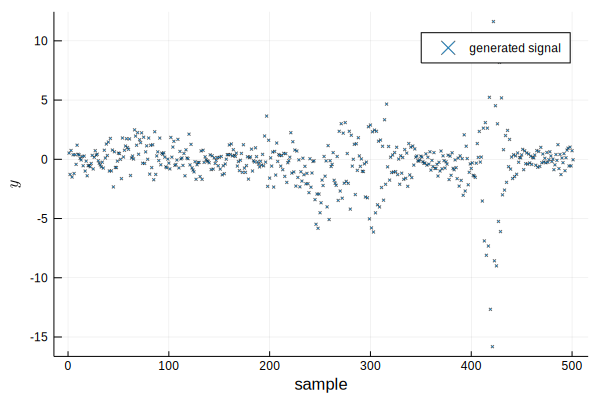

In [15]:
# Generate AR(2)-HGF
Random.seed!(69)
ARorder = 2
n_samples = 501
Œ∫, œâ, Œ≥ = 1, -2, 10
coefs, dataAR, tvar, rw = generateHGFAR(n_samples, ARorder, Œ∫, œâ, inv(Œ≥))
observations = [y[1] for y in dataAR]
scatter(observations, xlabel="sample", markershape = :xcross, markersize = 0.5, markeralpha = 0.6, ylabel=L"y", label="generated signal")

In [4]:
# Build factor graph
g = FactorGraph()
@RV Œ∏ ~ GaussianMeanVariance(placeholder(:m_Œ∏, dims=(ARorder, )), placeholder(:v_Œ∏, dims=(ARorder, ARorder)))
@RV z_t_prev ~ GaussianMeanPrecision(placeholder(:m_z_t_prev), placeholder(:w_z_t_prev))
@RV w_z ~ Gamma(placeholder(:a_w), placeholder(:b_w))
@RV z_t ~ GaussianMeanPrecision(z_t_prev, w_z)
@RV s_t = dot(placeholder(:x_t_prev, dims=(ARorder, )), Œ∏)
@RV œâ_t_prev ~ GaussianMeanPrecision(placeholder(:m_œâ_prev), placeholder(:w_œâ_prev))
@RV œâ_t ~ GaussianMeanPrecision(œâ_t_prev, 500.0)
@RV Œ∫_t_prev ~ GaussianMeanPrecision(placeholder(:m_Œ∫_prev), placeholder(:w_Œ∫_prev))
@RV Œ∫_t ~ GaussianMeanPrecision(Œ∫_t_prev, 500.0)
@RV x_t ~ GaussianControlledVariance(s_t, z_t, Œ∫_t, œâ_t)
@RV y_t ~ GaussianMeanVariance(x_t, tiny)
placeholder(y_t, :y_t)
ForneyLab.draw()

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 3945444317786726619 -->
 
 3945444317786726619 
 
 placeholder_v_Œ∏ 
 
<!-- 9366732902336837367 -->
 
 9366732902336837367 
 
 placeholder_m_Œ∏ 
 
<!-- 10526763360170765403 -->
 
 10526763360170765403 
 
 placeholder_m_œâ_prev 
 
<!-- 17192569680318434170 -->
 
 17192569680318434170 
 
 ùí© 
 gaussianmeanprecision_1 
 
<!-- 5209121291365061629 -->
 
 5209121291365061629 
 
 placeholder_m_z_t_prev 
 
<!-- 17192569680318434170--5209121291365061629 -->
 
 17192569680318434170--5209121291365061629 
 
 m_z_t_prev 
 1 out 
 2 m 
 
<!-- 8853780544837063100 -->
 
 8853780544837063100 
 
 placeholder_w_z_t_prev 
 
<!-- 17192569680318434170--8853780544837063100 -->
 
 17192569680318434170--8853780544837063100 
 
 w_z_t_prev 
 1 out 
 3 w 
 
<!-- 761945214189600125 -->
 
 761945214189600125 
 
 placeholder_m_Œ∫_prev 
 
<!-- 18172110058929181023 -->
 
 18172110058929181023 
 
 placeholder_w_œâ_prev 
 
<!-- 3187175038582338739 -->
 
 3187175038582338739 
 
 placeholder_y_t 
 
<!-- 14822355796138968542 -->
 
 14822355796138968542 
 
 ùí© 
 gaussianmeanvariance_2 
 
<!-- 3187175038582338739--14822355796138968542 -->
 
 3187175038582338739--14822355796138968542 
 
 y_t 
 1 out 
 1 out 
 
<!-- 3093383501343564115 -->
 
 3093383501343564115 
 
 ùí© 
 gaussianmeanvariance_1 
 
<!-- 3093383501343564115--3945444317786726619 -->
 
 3093383501343564115--3945444317786726619 
 
 v_Œ∏ 
 1 out 
 3 v 
 
<!-- 3093383501343564115--9366732902336837367 -->
 
 3093383501343564115--9366732902336837367 
 
 m_Œ∏ 
 1 out 
 2 m 
 
<!-- 13330627595102775196 -->
 
 13330627595102775196 
 
 placeholder_a_w 
 
<!-- 6074926736698744903 -->
 
 6074926736698744903 
 
 ùí© 
 gaussianmeanprecision_4 
 
<!-- 8989229567197810490 -->
 
 8989229567197810490 
 
 ùí© 
 gaussianmeanprecision_3 
 
<!-- 6074926736698744903--8989229567197810490 -->
 
 6074926736698744903--8989229567197810490 
 
 œâ_t_prev 
 1 out 
 2 m 
 
<!-- 15019675388577092037 -->
 
 15019675388577092037 
 
 clamp_1 
 
<!-- 6074926736698744903--15019675388577092037 -->
 
 6074926736698744903--15019675388577092037 
 
 clamp_1 
 1 out 
 3 w 
 
<!-- 15064009266304605628 -->
 
 15064009266304605628 
 
 ùí© 
 gaussianmeanprecision_2 
 
<!-- 15064009266304605628--17192569680318434170 -->
 
 15064009266304605628--17192569680318434170 
 
 z_t_prev 
 1 out 
 2 m 
 
<!-- 12243498922392135187 -->
 
 12243498922392135187 
 
 Gam 
 gamma_1 
 
<!-- 15064009266304605628--12243498922392135187 -->
 
 15064009266304605628--12243498922392135187 
 
 w_z 
 1 out 
 3 w 
 
<!-- 13613261321879641781 -->
 
 13613261321879641781 
 
 clamp_3 
 
<!-- 14822355796138968542--13613261321879641781 -->
 
 14822355796138968542--13613261321879641781 
 
 clamp_3 
 1 out 
 3 v 
 
<!-- 5376749718104977878 -->
 
 5376749718104977878 
 
 GCV 
 gaussiancontrolledvariance_1 
 
<!-- 14822355796138968542--5376749718104977878 -->
 
 14822355796138968542--5376749718104977878 
 
 x_t 
 1 out 
 2 m 
 
<!-- 2892917418706574629 -->
 
 2892917418706574629 
 
 placeholder_x_t_prev 
 
<!-- 8989229567197810490--10526763360170765403 -->
 
 8989229567197810490--10526763360170765403 
 
 m_œâ_prev 
 1 out 
 2 m 
 
<!-- 8989229567197810490--18172110058929181023 -->
 
 8989229567197810490--18172110058929181023 
 
 w_œâ_prev 
 1 out 
 3 w 
 
<!-- 6583815740445167168 -->
 
 6583815740445167168 
 
 placeholder_b_w 
 
<!-- 2419959982441661592 -->
 
 2419959982441661592 
 
 clamp_2 
 
<!-- 12243498922392135187--13330627595102775196 -->
 
 12243498922392135187--13330627595102775196 
 
 a_w 
 1 out 
 2 a 
 
<!-- 12243498922392135187--6583815740445167168 -->
 
 12243498922392135187--6583815740445167168 
 
 b_w 
 1 out 
 3 b 
 
<!-- 16765785793466378484 -->
 
 16765785793466378484 
 
 dot 
 dotproduct_1 
 
<!-- 16765785

In [5]:
# Specify recognition distribution
q = RecognitionFactorization([s_t, x_t], [z_t, z_t_prev], [œâ_t_prev, œâ_t], [Œ∫_t_prev, Œ∫_t], w_z, ids=[:X_t :Z_t :Œ© :Œö :Œìz])

# Build free energy and inference algorithm
algoF = freeEnergyAlgorithm(q)
algo = variationalAlgorithm(q)

eval(Meta.parse(algo))
eval(Meta.parse(algoF))

freeEnergy (generic function with 1 method)

In [6]:
# Priors
mœâ_0, vœâ_0 = -1.0, 1.0
mz_0, vz_0 = 1.0, 10.0
mŒ∏_0, vŒ∏_0 = zeros(ARorder), 10*diageye(ARorder)
mŒ∫_0, vŒ∫_0 = 1.0, 1.0
a_w_0, b_w_0 = 0.0001, 0.0001

# Initial marginals q
marginals = Dict()
marginals[:x_t_s_t] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2),v=10*diageye(2))
marginals[:Œ∫_t_Œ∫_t_prev] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2), v=10*diageye(2))
marginals[:œâ_t_œâ_t_prev] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2), v=10*diageye(2))
marginals[:z_t] = ProbabilityDistribution(GaussianMeanVariance, m=mz_0, v=vz_0)
marginals[:z_t_prev] = ProbabilityDistribution(GaussianMeanVariance, m=mz_0, v=vz_0)
marginals[:œâ_t] = ProbabilityDistribution(GaussianMeanVariance, m=mœâ_0, v=vœâ_0)
marginals[:w_z] = ProbabilityDistribution(Gamma, a=a_w_0, b=b_w_0)
marginals[:Œ∫_t] = ProbabilityDistribution(GaussianMeanVariance, m=mŒ∫_0, v=vŒ∫_0)

# Number of VMP iterations
n_its = 10

# Data storage
buf_size = n_samples - 1 # we start to process data from the second sample; first is always observed
mœâ = Array{Float64}(undef, buf_size)
vœâ = Array{Float64}(undef, buf_size)
ms = Array{Float64}(undef, buf_size)
vs = Array{Float64}(undef, buf_size)
mz = Array{Float64}(undef, buf_size)
vz = Array{Float64}(undef, buf_size)
mŒ∏ = Vector{Vector{Float64}}(undef, buf_size)
vŒ∏ = Vector{Array{Float64, 2}}(undef, buf_size)
aw = Array{Float64}(undef, buf_size)
bw = Array{Float64}(undef, buf_size)
F = Array{Float64}(undef, buf_size, n_its)
mŒ∫ = Array{Float64}(undef, buf_size)
vŒ∫ = Array{Float64}(undef, buf_size)

# we make first prediction based on our priors
predictions = [[mŒ∏_0'dataAR[1], sqrt(exp(mŒ∫_0*mz_0 + mœâ_0))]]

1-element Array{Array{Float64,1},1}:
 [0.0, 1.0]

In [7]:
p = Progress(length(observations), 1, "Observed ")
for t in 2:n_samples
    update!(p, t)
    data = Dict(:y_t => observations[t],
                :m_z_t_prev => mz_0,
                :w_z_t_prev => inv(vz_0),
                :x_t_prev => dataAR[t-1],
                :m_Œ∏ => mŒ∏_0,
                :v_Œ∏ => vŒ∏_0,
                :m_œâ_prev => mœâ_0,
                :w_œâ_prev => inv(vœâ_0),
                :a_w => a_w_0,
                :b_w => b_w_0,
                :m_Œ∫_prev => mŒ∫_0,
                :w_Œ∫_prev => inv(vŒ∫_0))
    for i in 1:n_its
        stepZ_t!(data, marginals)
        stepŒìz!(data, marginals)
        stepX_t!(data, marginals)
        stepŒö!(data, marginals)
        stepŒ©!(data, marginals)
        F[t-1, i] = freeEnergy(data, marginals)
    end
    mœâ[t-1], vœâ[t-1] = ForneyLab.unsafeMeanCov(marginals[:œâ_t])
    mz[t-1], vz[t-1] = ForneyLab.unsafeMeanCov(marginals[:z_t])
    mŒ∏[t-1], vŒ∏[t-1] = ForneyLab.unsafeMeanCov(marginals[:Œ∏])
    aw[t-1], bw[t-1] = marginals[:w_z].params[:a], marginals[:w_z].params[:b]
    mŒ∫[t-1], vŒ∫[t-1] = ForneyLab.unsafeMeanCov(marginals[:Œ∫_t])
    mz_0, vz_0 = mz[t-1], vz[t-1]
    mŒ∏_0, vŒ∏_0 = mŒ∏[t-1], vŒ∏[t-1]
    mœâ_0, vœâ_0 = mœâ[t-1], vœâ[t-1]
    mŒ∫_0, vŒ∫_0  = mŒ∫[t-1], vŒ∫[t-1]
    a_w_0, b_w_0 = aw[t-1], bw[t-1]
    ms[t-1], vs[t-1] = ForneyLab.unsafeMeanCov(marginals[:s_t])
    push!(predictions, [mŒ∏_0'dataAR[t], sqrt(exp(mŒ∫_0*mz_0 + mœâ_0))])
end

Observed 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| Time: 0:00:18


In [8]:
# Extract time-varying variance
tmp = mŒ∫.^2 .* vz .+ mz.^2 .* vŒ∫ .+ vz .* vŒ∫
tvmean = exp.(mŒ∫ .* mz .+ mœâ)
tvvar = exp.(2 .* mŒ∫ .* mz .+ 2 .* tmp).* exp.(2 .* mœâ .+ 2 .*vœâ) - exp.(2 .* mŒ∫ .* mz .+tmp).* exp.(2 .*mœâ .+ vœâ)

500-element Array{Float64,1}:
 14.65602263154755    
  2.3197625633825387  
  0.8620915285438531  
  0.4232934222606921  
  0.2624034244524879  
  0.18314084650395374 
  0.13883734060635153 
  0.1455349757330209  
  0.15574770253329107 
  0.1442931318853466  
  0.12221472393074648 
  0.1046711980798471  
  0.09313508993645464 
  ‚ãÆ                   
  0.028004499848457126
  0.028239779326821257
  0.029163930768699914
  0.028242647238674007
  0.029465663155055083
  0.027367356935103365
  0.028291734913065303
  0.029482091338786598
  0.03169939629893945 
  0.03425144898985499 
  0.03685763471048886 
  0.0380194582570553  

## Plotting

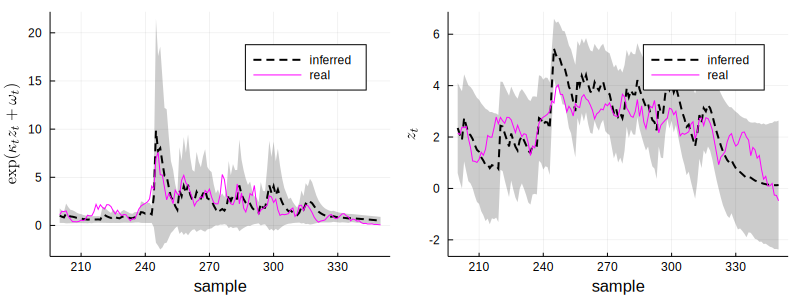

In [9]:
from, upto = 200, 350

plot(collect(from:upto), tvmean[from:upto], ribbon=sqrt.(tvvar[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
ptvv = plot!(collect(from:upto), tvar[from:upto], color=:magenta, label="real", title="", ylabel=L"\exp(\kappa_t z_t + \omega_t)", xlabel="sample")

plot(collect(from:upto), mz[from:upto], ribbon=sqrt.(vz[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
pzt = plot!(collect(from:upto), rw[from:upto], color=:magenta, label="real", title="", ylabel=L"z_t", xlabel="sample")

plot(ptvv, pzt, layout=(1,2),  size=(800, 300), legend=true, xlabel="sample")

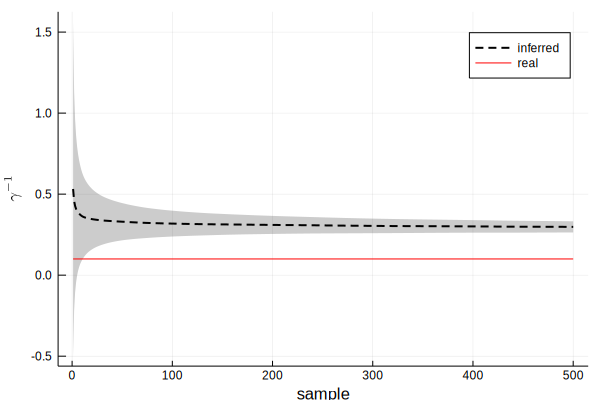

In [10]:
# variance upper layer 1/Œ≥
plot(bw./aw, ribbon=sqrt.(bw./ aw.^2 ),
      linestyle=:dash, linewidth = 2,
      color=:black,
      fillalpha = 0.2,
      fillcolor = :black,
      label=["inferred"])
plot!(0.1*ones(length(aw)), color=:red, label="real", title="", xlabel="sample", ylabel=L"\gamma^{-1}")

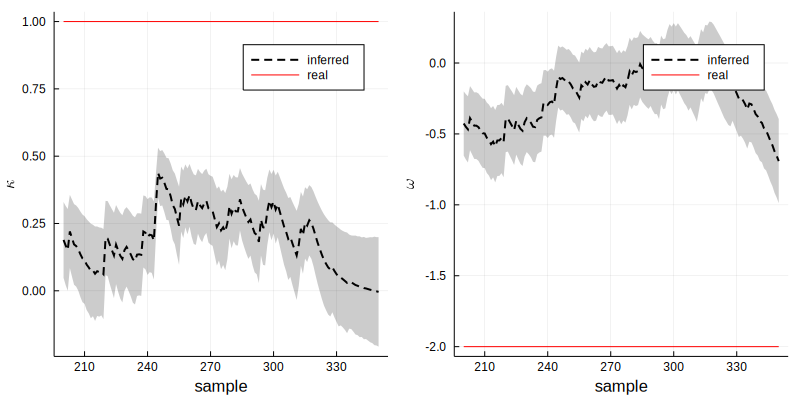

In [11]:
from, upto = 200, 350

# kappa
plot(collect(from:upto), mŒ∫[from:upto], ribbon=sqrt.(vŒ∫[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
kplot = plot!(collect(from:upto), ones(length(mŒ∫[from:upto])), color=:red, label="real", title="", ylabel=L"\kappa")

# omega
plot(collect(from:upto), mœâ[from:upto], ribbon=sqrt.(vœâ[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["inferred"])
oplot = plot!(collect(from:upto), -2*ones(length(mŒ∫[from:upto])), color=:red, label="real", title="", ylabel=L"\omega")

plot(kplot, oplot, layout=(1,2),  size=(800, 400), legend=true, xlabel="sample")

In [12]:
# Plotting countours (only for AR(2))
function plotŒ∏(mŒ∏, vŒ∏, coefs, sample, prior)
    m_Œ∏_0 = prior[1]
    v_Œ∏_0 = prior[2]
    ùìù(x, Œº, Œ£) = 1/((2 * œÄ)^(length(Œº)/2) * det(Œ£)^(1/2)) * exp(-(1/2) * (x-Œº)' * Œ£^(-1) * (x-Œº));
    len=64
    plot()
    if coefs[1] < m_Œ∏_0[1]
        xlims!(coefs[1] - 0.42, m_Œ∏_0[1] + 0.42)
    else
        xlims!(m_Œ∏_0[1] - 0.42, coefs[1] + 0.42)
    end
    if coefs[2] < m_Œ∏_0[2]
        ylims!(coefs[2] - 0.42, m_Œ∏_0[2] + 0.42)
    else
        ylims!(m_Œ∏_0[2] - 0.42, coefs[2] + 0.42)
    end
    plot!([m_Œ∏_0[1]],[m_Œ∏_0[2]], seriestype=:scatter, title = "t=$(sample)", label="prior")
    plot!([coefs[1]],[coefs[2]], seriestype=:scatter, label="true")
    plot!([mŒ∏[sample][1]],[mŒ∏[sample][2]], seriestype=:scatter, label="posterior")
    # Posterior
    # get the maximum œÉ (used to construct the x and y ranges)
    œÉ_max = sqrt((vŒ∏[sample][1] > vŒ∏[sample][4]) ? vŒ∏[sample][1] : vŒ∏[sample][4])
    rx = range(mŒ∏[sample][1]-3*œÉ_max, mŒ∏[sample][1]+3*œÉ_max, length=len)
    ry = range(mŒ∏[sample][2]-3*œÉ_max, mŒ∏[sample][2]+3*œÉ_max, length=len)
    contour!(rx, ry, (x1, x2) -> ùìù([x1 ; x2], mŒ∏[sample], vŒ∏[sample]), xlabel=L"\theta^{(1)}_1", ylabel=L"\theta^{(1)}_2")
    # prior
    œÉ_max_p = sqrt((v_Œ∏_0[1] > v_Œ∏_0[4]) ? v_Œ∏_0[1] : v_Œ∏_0[4])
    rx_p = range(m_Œ∏_0[1]-3*œÉ_max, m_Œ∏_0[1]+3*œÉ_max, length=len)
    ry_p = range(m_Œ∏_0[2]-3*œÉ_max, m_Œ∏_0[2]+3*œÉ_max, length=len)
    pŒ∏1 = contour!(rx, ry, (x1, x2) -> ùìù([x1 ; x2], m_Œ∏_0, v_Œ∏_0), xlabel=L"\theta^{(1)}_1", ylabel=L"\theta^{(1)}_2")
    return pŒ∏1
end

plotŒ∏ (generic function with 1 method)

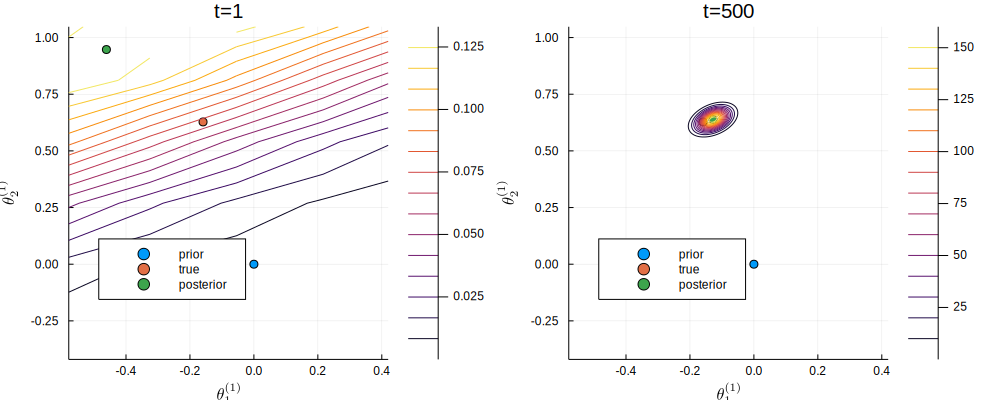

In [13]:
# AR coefs
ARorder = 2
pŒ∏tprev = plotŒ∏(mŒ∏, vŒ∏, coefs, 1, [zeros(ARorder), 10*diageye(ARorder)])
pŒ∏t = plotŒ∏(mŒ∏, vŒ∏, coefs, 500, [zeros(ARorder), 10*diageye(ARorder)])
plot(pŒ∏tprev, pŒ∏t, layout=(1,2),  size=(1000, 400), legend=:bottomleft)

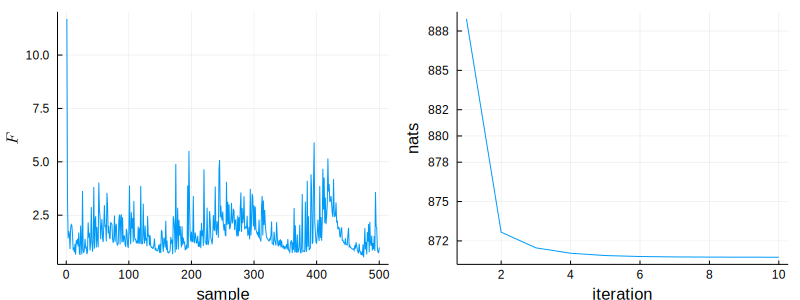

In [14]:
# free energy
fe = F[:,end]
fet = plot(fe, label="real", xlabel="sample", ylabel=L"F", legend=false)
fei = plot(sum(F,dims=1)', xlabel="iteration", ylabel="nats", legend=false)
plot(fet, fei, layout=(1,2),  size=(800, 300), legend=false)

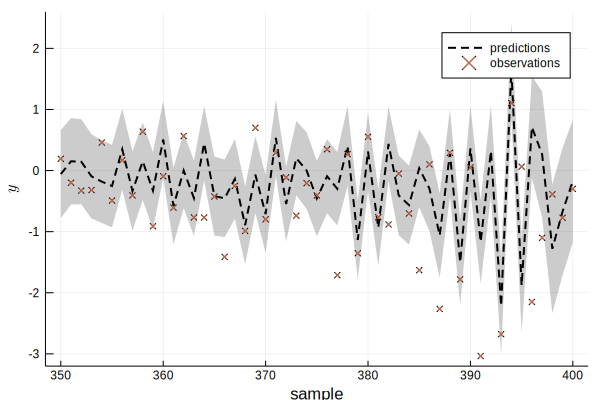

In [15]:
# predictions
from, upto = 350, 400
means = [x[1] for x in predictions]
vars = [x[2] for x in predictions]
plot(collect(from:upto), means[from:upto], ribbon=vars[from:upto], linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label=["predictions"])
scatter!(collect(from:upto), observations[from+1:upto+1], label="observations", markershape = :xcross, markersize = 2, ylabel=L"y", xlabel="sample")

## Animation

In [21]:
# Define functions for animation
function animate_states(means, vars, y, label; delta=.1, toshow=10)
    anim = @animate for i in 1:length(means)-toshow-1
        s = plot(xticks = i:div(toshow, 2):i+toshow, xlims=(i,i+1.5*toshow));
        ylims!(minimum(means[i:i+toshow]) - delta, maximum(means[i:i+toshow]) + delta);
        if all(el==y[1] for el in y)
            plot(collect(i:i+toshow), y[i:i+toshow], color=:magenta, xlabel="time T", ylabel=label, label="observation")
            fcolor = :black
        else
            scatter!(collect(i:i+toshow), y[i:i+toshow], xlabel="time T", ylabel=label, label="observation",
            markershape = :xcross, markeralpha = 0.9, markersize = 3)
            fcolor = :orange
        end
        plot!(collect(i:i+toshow), means[i:i+toshow], ribbon=sqrt.(vars[i:i+toshow]),
             linestyle=:dash, linewidth = 2,
             color=:black,
             fillalpha = 0.2,
             fillcolor = fcolor,
             label="inferred")
    end;
    return anim
end

function animate_params(means, vars, y, label; delta=.1)
   anim = @animate for i in 1:length(means)
        s = plot(y, label="real", ylabel=label, color=:magenta);
        min = minimum(y) <= minimum(means) ? minimum(y) : minimum(means)
        max = maximum(y) >= maximum(means) ? maximum(y) : maximum(means)
        ylims!(min - delta, max + delta);
        plot!(collect(1:i), means[1:i], ribbon=sqrt.(vars[1:i]),
             linestyle=:dash, linewidth = 2,
             color=:black,
             fillalpha = 0.2,
             fillcolor = :black,
             label="inferred")
   end;
   return anim
end

animate_params (generic function with 1 method)

In [22]:
# Œ∫
animation = animate_params(mŒ∫, vŒ∫, Œ∫*ones(length(mŒ∫)), L"\kappa")
gif(animation, "gifs/kappa.gif", fps = 100)

‚îå Info: Saved animation to 
‚îÇ   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/kappa.gif
‚îî @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/kappa.gif")

In [23]:
# œâ
animation = animate_params(mœâ, vœâ, œâ*ones(length(mœâ)), L"\omega")
gif(animation, "gifs/omega.gif", fps = 100)

‚îå Info: Saved animation to 
‚îÇ   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/omega.gif
‚îî @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/omega.gif")

In [24]:
# Œ≥
animation = animate_params(bw./aw, bw./ aw.^2, inv(Œ≥)*ones(length(mŒ∫)), L"\gamma^{-1}", delta=0.5)
gif(animation, "gifs/gamma.gif", fps = 100)

‚îå Info: Saved animation to 
‚îÇ   fn = /Users/albertpod/Documents/Julia/L4DC-2020/gifs/gamma.gif
‚îî @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/L4DC-2020/gifs/gamma.gif")